In [94]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read the dataset

In [95]:
from pandas import read_csv
A = read_csv("C:/Users/Sourabh/Downloads/Cars93.csv")

In [96]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


#  Replace Missing Data

In [97]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)
            

In [98]:
from PM8 import replacer
replacer(A)

# Drop unnecessary columns

In [99]:
A = A.drop(labels=["id","Make","Manufacturer","Model"],axis=1)

# Exploratory Data Analysis

In [100]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [101]:
cat

['Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin']

In [102]:
nrows = round(len(cat)/3,0)+1

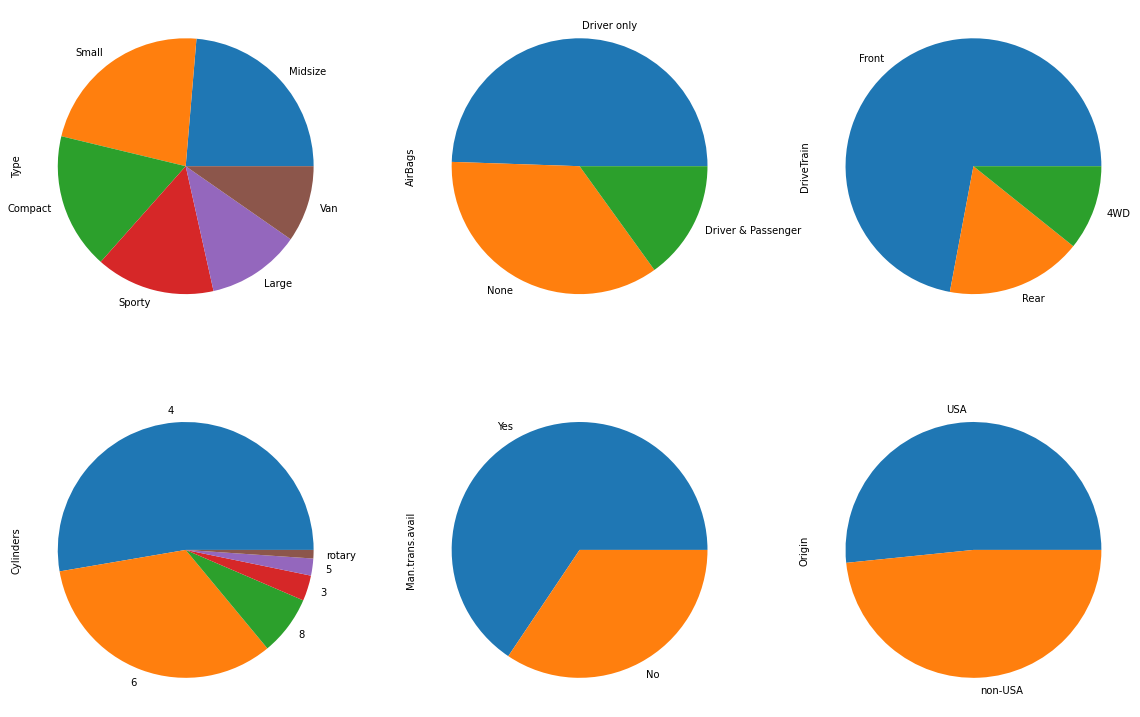

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(nrows,3,w)
    A[i].value_counts().plot(kind="pie")
    w = w + 1


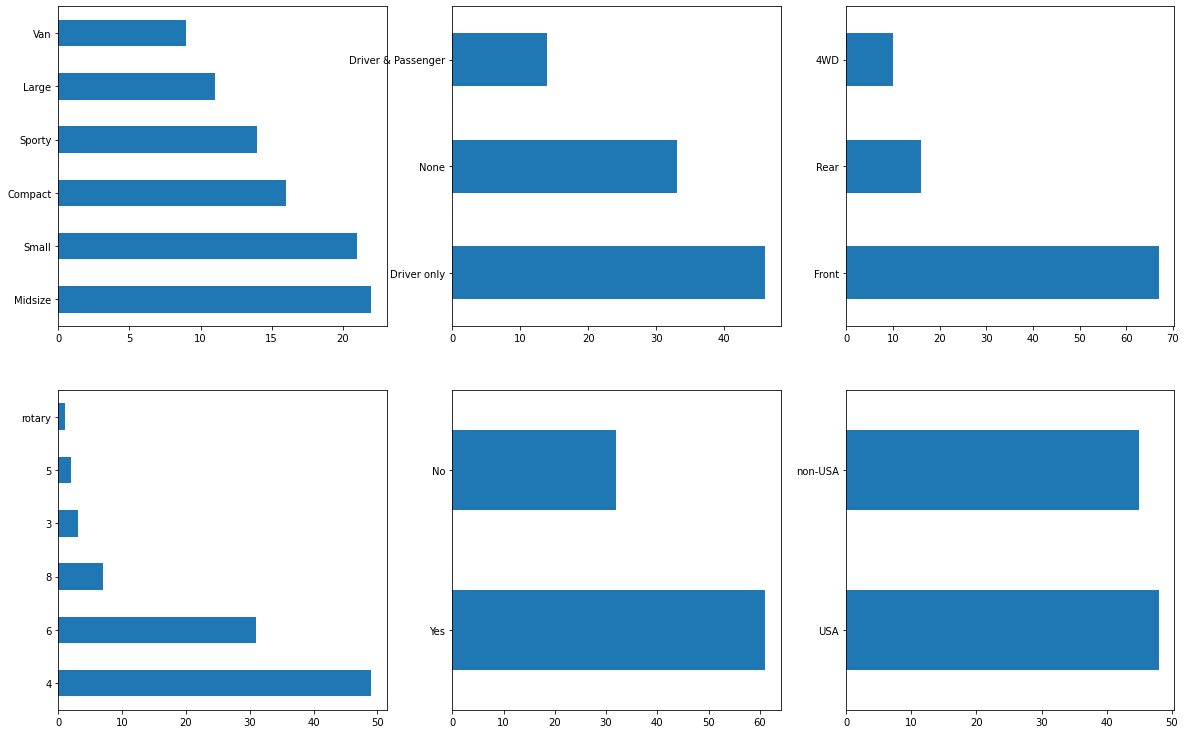

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(nrows,3,w)
    A[i].value_counts().plot(kind="barh")
    w = w + 1

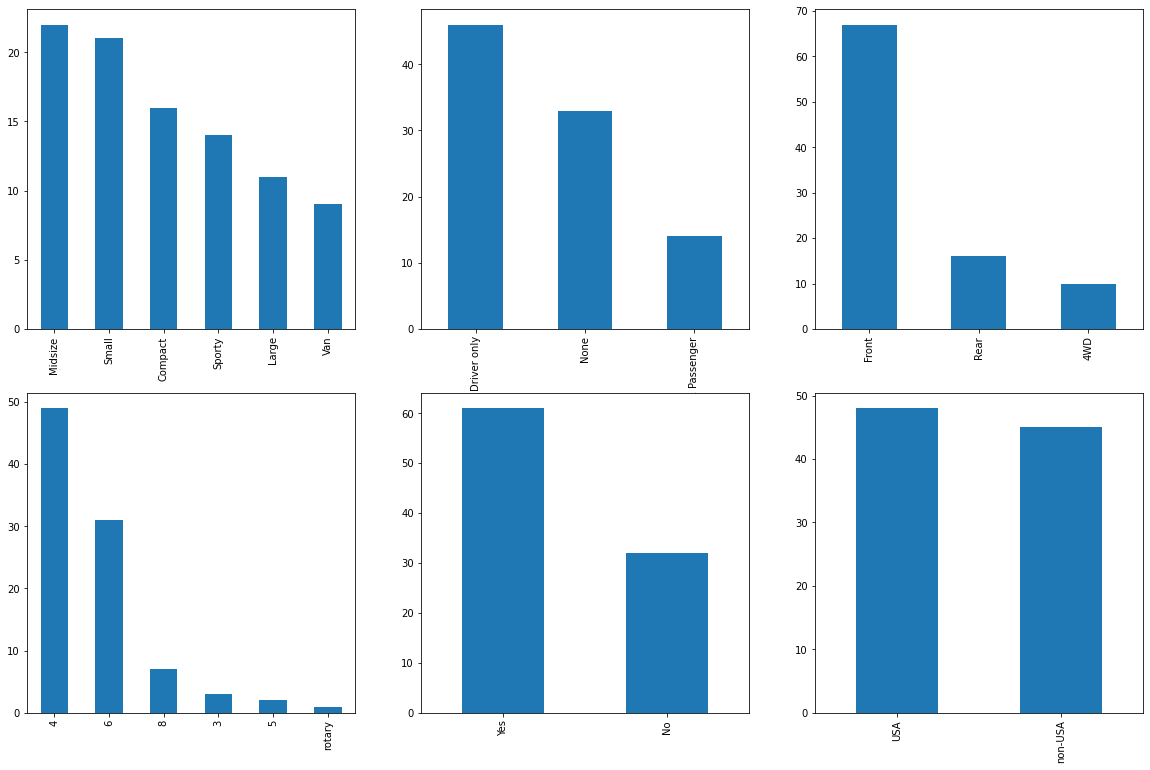

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(nrows,3,w)
    A[i].value_counts().plot(kind="bar")
    w = w + 1

In [112]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [113]:
ANOVA(A,"Origin","Price")

0.337

In [114]:
pd.crosstab(A.Type,A.Origin)

Origin,USA,non-USA
Type,,
Compact,7,9
Large,11,0
Midsize,10,12
Small,7,14
Sporty,8,6
Van,5,4


In [115]:
pd.crosstab(A.Type,A.AirBags)

AirBags,Driver & Passenger,Driver only,None
Type,,,
Compact,2,9,5
Large,3,8,0
Midsize,6,12,4
Small,0,5,16
Sporty,3,9,2
Van,0,3,6


# Define X and Y 

In [74]:
Y = A[["Type"]]
X = A.drop(labels=["Type"],axis=1)

# Data preparation

In [8]:
import pandas as pd
Xcat = pd.get_dummies(A[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xcon = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X = Xcon.join(Xcat)

# Divide the data in training and testing set

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

# Create a Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model = dtc.fit(xtrain,ytrain)

# predict() method

In [11]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [12]:
E = ytrain[["Type"]]
E['Predicted_Type_in_training']=pred_tr
E.head(10)

,Type,Predicted_Type_in_training
15,Van,Van
20,Compact,Compact
37,Large,Large
22,Small,Small
33,Sporty,Sporty
74,Sporty,Sporty
70,Large,Large
19,Large,Large
50,Midsize,Midsize
21,Large,Large


In [13]:
F = ytest[["Type"]]
F['Predicted_Type_in_Testing']=pred_ts
F.head(10)

,Type,Predicted_Type_in_Testing
51,Large,Midsize
8,Midsize,Large
36,Midsize,Midsize
72,Small,Small
76,Large,Midsize
0,Small,Compact
34,Sporty,Midsize
62,Midsize,Midsize
7,Large,Large
69,Van,Van


# Find error| loss

In [14]:
# accuracy score : How many correct/Total

from sklearn.metrics import accuracy_score
accuracy_score(ytrain,pred_tr)

1.0

In [15]:
accuracy_score(ytest,pred_ts)

0.47368421052631576

# Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy: ",accuracy_score(ytest,pred_ts))

Training Accuracy:  1.0
Testing Accuracy:  0.7368421052631579


# Simple tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy: ",accuracy_score(ytest,pred_ts))

Training Accuracy:  1.0
Testing Accuracy:  0.47368421052631576


# pruned_tree based on max depth

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=4)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy:",accuracy_score(ytest,pred_ts))

Training Accuracy: 0.8918918918918919
Testing Accuracy: 0.5263157894736842


In [18]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
tg = {"max_depth":range(1,20,1)}
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 6}

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=6)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy:",accuracy_score(ytest,pred_ts))

Training Accuracy: 1.0
Testing Accuracy: 0.47368421052631576


# pruned tree based on min samples at leaf

In [20]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
tg = {"min_samples_leaf":range(1,20,1)}
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 5}

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=5)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy:",accuracy_score(ytest,pred_ts))

Training Accuracy: 0.9054054054054054
Testing Accuracy: 0.47368421052631576


# pruned tree based on min samples used for splitting

In [22]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
tg = {"min_samples_split":range(1,20,1)}
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 2}

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy:",accuracy_score(ytest,pred_ts))

Training Accuracy: 1.0
Testing Accuracy: 0.47368421052631576


In [24]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    print("------------------",i,"-------------------")
    print("Training Accuracy: ",accuracy_score(ytrain,pred_tr))
    print("Testing Accuracy: ",accuracy_score(ytest,pred_ts))

------------------ 2 -------------------
Training Accuracy:  1.0
Testing Accuracy:  0.47368421052631576
------------------ 3 -------------------
Training Accuracy:  1.0
Testing Accuracy:  0.47368421052631576
------------------ 4 -------------------
Training Accuracy:  0.9864864864864865
Testing Accuracy:  0.47368421052631576
------------------ 5 -------------------
Training Accuracy:  0.9864864864864865
Testing Accuracy:  0.47368421052631576
------------------ 6 -------------------
Training Accuracy:  0.9864864864864865
Testing Accuracy:  0.47368421052631576
------------------ 7 -------------------
Training Accuracy:  0.9864864864864865
Testing Accuracy:  0.47368421052631576
------------------ 8 -------------------
Training Accuracy:  0.9864864864864865
Testing Accuracy:  0.47368421052631576
------------------ 9 -------------------
Training Accuracy:  0.9864864864864865
Testing Accuracy:  0.47368421052631576
------------------ 10 -------------------
Training Accuracy:  0.95945945945945

In [25]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    print("------------------",i,"-------------------")
    print("Training Accuracy: ",round(accuracy_score(ytrain,pred_tr),2))
    print("Testing Accuracy: ",round(accuracy_score(ytest,pred_ts),2))

------------------ 2 -------------------
Training Accuracy:  1.0
Testing Accuracy:  0.47
------------------ 3 -------------------
Training Accuracy:  1.0
Testing Accuracy:  0.47
------------------ 4 -------------------
Training Accuracy:  0.99
Testing Accuracy:  0.47
------------------ 5 -------------------
Training Accuracy:  0.99
Testing Accuracy:  0.47
------------------ 6 -------------------
Training Accuracy:  0.99
Testing Accuracy:  0.47
------------------ 7 -------------------
Training Accuracy:  0.99
Testing Accuracy:  0.47
------------------ 8 -------------------
Training Accuracy:  0.99
Testing Accuracy:  0.47
------------------ 9 -------------------
Training Accuracy:  0.99
Testing Accuracy:  0.47
------------------ 10 -------------------
Training Accuracy:  0.96
Testing Accuracy:  0.47
------------------ 11 -------------------
Training Accuracy:  0.96
Testing Accuracy:  0.47
------------------ 12 -------------------
Training Accuracy:  0.96
Testing Accuracy:  0.47
---------

In [26]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    print("------------------",i,"-------------------")
    print("Training Accuracy: ",round(accuracy_score(ytrain,pred_tr),2))
    print("Testing Accuracy: ",round(accuracy_score(ytest,pred_ts),2))

------------------ 2 -------------------
Training Accuracy:  0.96
Testing Accuracy:  0.37
------------------ 3 -------------------
Training Accuracy:  0.95
Testing Accuracy:  0.47
------------------ 4 -------------------
Training Accuracy:  0.92
Testing Accuracy:  0.47
------------------ 5 -------------------
Training Accuracy:  0.91
Testing Accuracy:  0.47
------------------ 6 -------------------
Training Accuracy:  0.91
Testing Accuracy:  0.47
------------------ 7 -------------------
Training Accuracy:  0.91
Testing Accuracy:  0.47
------------------ 8 -------------------
Training Accuracy:  0.91
Testing Accuracy:  0.47
------------------ 9 -------------------
Training Accuracy:  0.89
Testing Accuracy:  0.63
------------------ 10 -------------------
Training Accuracy:  0.8
Testing Accuracy:  0.42
------------------ 11 -------------------
Training Accuracy:  0.76
Testing Accuracy:  0.32
------------------ 12 -------------------
Training Accuracy:  0.74
Testing Accuracy:  0.42
--------